# Dados climáticos CEPAGRI (município de Campinas)

Período: 01/01/2010 a 14/02/2022
Fonte: https://www.agritempo.gov.br/agritempo/jsp/PesquisaClima/index.jsp?siglaUF=SP&lang=pt_br
Estação meteorológica: CAMPINAS - CEPAGRI / UNICAMP

In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [480]:
dfClima = pd.read_excel(r'dadosClimaticos_35.xls', skiprows=7)
#Define first row of dataframe as header
dfClima.columns = dfClima.iloc[0]
#Drop first line
dfClima.drop(labels=0, axis=0, inplace=True)
#dfClima = dfClima.iloc[1:] -> Same result as line above
dfClima.tail()

,data,tMin,tMin Estimada,tMed,tMed Estimada,tMax,tMax Estimada,precipitacao,precipitacao Estimada,estiagem*,...,radiacaoSolar,velocidadeVento,direcaoVento,horarioVento,pontoOrvalhoMinimo,pontoOrvalhoMaximo,pressaoAtmMinima,pressaoAtmMaxima,evapotranspiracaoReal*,disponibilidadeAguaSolo*
4424,2010-01-05 00:00:00,20.87,nÃ£o,27.3,nÃ£o,33.73,nÃ£o,5.33,nÃ£o,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.23,83.84
4425,2010-01-04 00:00:00,21.46,nÃ£o,28.07,nÃ£o,34.68,nÃ£o,0,nÃ£o,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.66,83.74
4426,2010-01-03 00:00:00,21.2,nÃ£o,28.16,nÃ£o,35.11,nÃ£o,2.54,nÃ£o,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.23,88.4
4427,2010-01-02 00:00:00,21.27,nÃ£o,26.18,nÃ£o,31.08,nÃ£o,3.05,nÃ£o,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.43,91.09
4428,2010-01-01 00:00:00,20.07,nÃ£o,24.11,nÃ£o,28.15,nÃ£o,0,nÃ£o,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.22,92.47


In [481]:
dfClima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 1 to 4428
Data columns (total 26 columns):
data                            4428 non-null object
 tMin                           4428 non-null object
 tMin Estimada                  4428 non-null object
 tMed                           4428 non-null object
 tMed Estimada                  4428 non-null object
 tMax                           4428 non-null object
 tMax Estimada                  4428 non-null object
 precipitacao                   4428 non-null object
 precipitacao Estimada          4428 non-null object
 estiagem*                      3951 non-null object
 estiagemAgricola*              3951 non-null object
 urMin                          4377 non-null object
 urMin Estimada                 4428 non-null object
 urMax                          4376 non-null object
 urMax Estimada                 4428 non-null object
 evapotranspiracaoPotencial     3653 non-null object
 radiacaoSolar                  0 non-null ob

In [482]:
dfClima.columns

Index(['data ', ' tMin ', ' tMin Estimada ', ' tMed ', ' tMed Estimada ',
       ' tMax ', ' tMax Estimada ', ' precipitacao ',
       ' precipitacao Estimada ', ' estiagem* ', ' estiagemAgricola* ',
       ' urMin ', ' urMin Estimada ', ' urMax ', ' urMax Estimada ',
       ' evapotranspiracaoPotencial ', ' radiacaoSolar ', ' velocidadeVento ',
       ' direcaoVento ', ' horarioVento ', ' pontoOrvalhoMinimo ',
       ' pontoOrvalhoMaximo ', ' pressaoAtmMinima ', ' pressaoAtmMaxima ',
       ' evapotranspiracaoReal* ', ' disponibilidadeAguaSolo*'],
      dtype='object', name=0)

In [483]:
#Slicing original dataframe to get specific columns
dfClimaSlice = dfClima.iloc[:,[0, 1, 3, 5, 7, 11, 13]]
dfClimaSlice.head()

,data,tMin,tMed,tMax,precipitacao,urMin,urMax
1,2022-02-14 00:00:00,19.52,25.38,31.23,0,50.48,87.9
2,2022-02-13 00:00:00,18.75,25.32,31.89,0,44.21,86
3,2022-02-12 00:00:00,18.68,24.63,30.58,0.51,53.22,85.9
4,2022-02-11 00:00:00,18.41,24.3,30.19,0,49.04,83.8
5,2022-02-10 00:00:00,17.21,23.52,29.83,0,46.78,85.7


In [484]:
dfClimaSlice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 1 to 4428
Data columns (total 7 columns):
data              4428 non-null object
 tMin             4428 non-null object
 tMed             4428 non-null object
 tMax             4428 non-null object
 precipitacao     4428 non-null object
 urMin            4377 non-null object
 urMax            4376 non-null object
dtypes: object(7)
memory usage: 276.8+ KB


In [485]:
#Changing data types
dfClimaSlice.iloc[:, 0] = pd.to_datetime(dfClimaSlice.iloc[:, 0])
dfClimaSlice.iloc[:, [1, 2, 3, 4, 5, 6]] = dfClimaSlice.iloc[:, [1, 2, 3, 4, 5, 6]].astype('float64')
dfClimaSlice.info()

C:\Users\ML162\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\ML162\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 1 to 4428
Data columns (total 7 columns):
data              4428 non-null datetime64[ns]
 tMin             4428 non-null float64
 tMed             4428 non-null float64
 tMax             4428 non-null float64
 precipitacao     4428 non-null float64
 urMin            4377 non-null float64
 urMax            4376 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 276.8 KB


In [486]:
#Renaming columns by column number because the original name contains blanck spaces
#We can access column number by gettin a list of the columns name with df.columns[i]
#where i is the index of each member of the list
dfClimaSlice.rename(columns={dfClimaSlice.columns[0]: "Data", dfClimaSlice.columns[1]: "tMin",
                    dfClimaSlice.columns[2]: "tMed", dfClimaSlice.columns[3]: "tMax",
                    dfClimaSlice.columns[4]: "precipit", dfClimaSlice.columns[5]: "urMin",
                    dfClimaSlice.columns[6]: "urMax"}, inplace=True)

C:\Users\ML162\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [487]:
dfClimaSlice.head()

,Data,tMin,tMed,tMax,precipit,urMin,urMax
1,2022-02-14,19.52,25.38,31.23,0.00,50.48,87.9
2,2022-02-13,18.75,25.32,31.89,0.00,44.21,86.0
3,2022-02-12,18.68,24.63,30.58,0.51,53.22,85.9
4,2022-02-11,18.41,24.30,30.19,0.00,49.04,83.8
5,2022-02-10,17.21,23.52,29.83,0.00,46.78,85.7


In [488]:
urMinMedio = dfClimaSlice.urMin[dfClimaSlice.urMin.isna()==False].mean()
urMaxMedio = dfClimaSlice.urMax[dfClimaSlice.urMax.isna()==False].mean()

In [489]:
dfClimaSlice.urMin.mean()

44.530628284213

In [490]:
urMaxMedio

88.08548674588644

In [491]:
#Repacing missing values with the mean
dfClimaSlice.urMin.fillna(value=urMinMedio, inplace=True)
dfClimaSlice.urMax.fillna(value=urMaxMedio, inplace=True)

C:\Users\ML162\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [492]:
indexURMINnan = dfClimaSlice[dfClimaSlice.urMin.isna()].index
indexURMAXnan = dfClimaSlice[dfClimaSlice.urMax.isna()].index

In [493]:
indexURMINnan #empty list

Int64Index([], dtype='int64')

In [494]:
indexURMAXnan #empty list

Int64Index([], dtype='int64')

In [495]:
dfClimaSlice.sort_values(by='Data', ascending=True, inplace=True)

C:\Users\ML162\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [496]:
dfClimaSlice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 4428 to 1
Data columns (total 7 columns):
Data        4428 non-null datetime64[ns]
tMin        4428 non-null float64
tMed        4428 non-null float64
tMax        4428 non-null float64
precipit    4428 non-null float64
urMin       4428 non-null float64
urMax       4428 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 276.8 KB


In [497]:
dfClimaSlice.head()

,Data,tMin,tMed,tMax,precipit,urMin,urMax
4428,2010-01-01,20.07,24.11,28.15,0.00,68.76,93.4
4427,2010-01-02,21.27,26.18,31.08,3.05,57.82,96.6
4426,2010-01-03,21.20,28.16,35.11,2.54,41.18,94.8
4425,2010-01-04,21.46,28.07,34.68,0.00,40.75,91.4
4424,2010-01-05,20.87,27.30,33.73,5.33,48.08,91.5


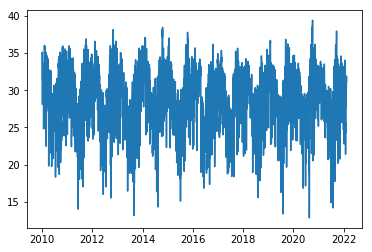

In [498]:
x=np.asarray(dfClimaSlice.Data)
y=np.asarray(dfClimaSlice.tMax)
plt.plot(x, y)

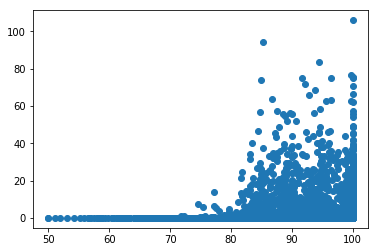

In [499]:
plt.scatter(x=dfClimaSlice.urMax, y=dfClimaSlice.precipit)

In [500]:
dfClimaSlice['Ano'] = dfClimaSlice['Data'].apply(lambda x: x.year)

C:\Users\ML162\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [501]:
dfClimaSlice.head()

,Data,tMin,tMed,tMax,precipit,urMin,urMax,Ano
4428,2010-01-01,20.07,24.11,28.15,0.00,68.76,93.4,2010
4427,2010-01-02,21.27,26.18,31.08,3.05,57.82,96.6,2010
4426,2010-01-03,21.20,28.16,35.11,2.54,41.18,94.8,2010
4425,2010-01-04,21.46,28.07,34.68,0.00,40.75,91.4,2010
4424,2010-01-05,20.87,27.30,33.73,5.33,48.08,91.5,2010


In [502]:
#Slicing dataframe into train dataframe and test dataframe
dfClimaSliceTrain = dfClimaSlice[dfClimaSlice['Ano']<2022].drop(columns=['Data', 'tMin', 'tMed', 'Ano'])
dfClimaSliceTest = dfClimaSlice[dfClimaSlice['Ano']==2022].drop(columns=['Data', 'tMin', 'tMed', 'Ano'])

In [503]:
dfClimaSliceTrain.head()

,tMax,precipit,urMin,urMax
4428,28.15,0.00,68.76,93.4
4427,31.08,3.05,57.82,96.6
4426,35.11,2.54,41.18,94.8
4425,34.68,0.00,40.75,91.4
4424,33.73,5.33,48.08,91.5


In [504]:
dfClimaSliceTest.head()

,tMax,precipit,urMin,urMax
45,26.16,25.40,71.20,91.4
44,28.70,10.92,61.65,91.0
43,28.33,0.25,57.18,90.4
42,30.37,0.25,58.91,89.5
41,28.92,1.27,63.76,90.2


In [505]:
x = np.asarray(dfClimaSliceTrain[['precipit', 'urMin', 'urMax']])
y = np.asarray(dfClimaSliceTrain['tMax'])

In [506]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
regLin = LinearRegression()
regLin.fit(x_train, y_train)
y_pred = regLin.predict(x_test)

In [518]:
y_pred

array([30.33575805, 30.63923267, 29.22130237, ..., 28.67792803,
       28.01393544, 31.2522737 ])

In [514]:
dfComparing = pd.DataFrame(data=[y_test, y_pred]).T
dfComparing.columns = ['y_test', 'y_pred']
dfComparing.head()

,y_test,y_pred
0,30.49,30.335758
1,28.28,30.639233
2,28.61,29.221302
3,28.42,29.226672
4,18.61,21.318392


In [515]:
dfComparing['erro'] = (dfComparing.y_test - dfComparing.y_pred)**2
dfComparing['erro'] = dfComparing['erro'].apply(lambda x: np.sqrt(x))
dfComparing.head(10)

,y_test,y_pred,erro
0,30.49,30.335758,0.154242
1,28.28,30.639233,2.359233
2,28.61,29.221302,0.611302
3,28.42,29.226672,0.806672
4,18.61,21.318392,2.708392
5,26.21,26.880504,0.670504
6,27.16,30.312904,3.152904
7,30.13,27.378136,2.751864
8,28.73,27.819216,0.910784
9,22.03,24.590532,2.560532


In [546]:
slope = regLin.coef_
coef_lin = regLin.intercept_

In [554]:
slope, coef_lin

(array([ 0.04666784, -0.16836199,  0.0661073 ]), 30.42032149725246)

In [524]:
dfClimaSliceTest.head()

,tMax,precipit,urMin,urMax
45,26.16,25.40,71.20,91.4
44,28.70,10.92,61.65,91.0
43,28.33,0.25,57.18,90.4
42,30.37,0.25,58.91,89.5
41,28.92,1.27,63.76,90.2


In [563]:
x2 = np.asarray(dfClimaSliceTest.iloc[:, [1, 2, 3]])

In [553]:
y_pred2 = np.dot(x2, slope) + coef_lin
y_pred2

array([25.66051834, 26.56618201, 26.78114982, 26.43038701, 25.70770769,
       25.5779208 , 25.73094227, 23.93504618, 25.5922842 , 24.34119733,
       25.08779412, 25.51294946, 24.82261106, 28.42705868, 27.97750454,
       28.00709629, 31.04240965, 27.22242547, 30.22558413, 28.56981636,
       29.08455792, 30.83757744, 29.97744631, 31.5946625 , 30.30973818,
       29.15889463, 29.37638126, 27.55289239, 27.38102576, 23.92486062,
       23.17460015, 24.5504139 , 26.57951211, 23.05603549, 25.31385902,
       27.34234461, 26.11412632, 27.73111258, 25.16904867, 27.92964357,
       28.20974321, 27.70364126, 27.16251408, 28.66226571, 27.73223992])

In [556]:
resultReal = np.asarray(dfClimaSliceTest['tMax'])
resultReal

array([26.16, 28.7 , 28.33, 30.37, 28.92, 28.46, 28.86, 24.99, 27.34,
       22.78, 25.36, 25.58, 26.98, 31.92, 33.05, 31.81, 29.2 , 30.57,
       32.96, 32.25, 32.65, 33.66, 33.58, 34.04, 33.58, 33.72, 31.55,
       31.36, 30.02, 24.19, 21.39, 25.44, 25.63, 24.33, 28.25, 29.61,
       29.34, 29.01, 27.65, 30.3 , 29.83, 30.19, 30.58, 31.89, 31.23])

In [579]:
dfComparing2 = pd.DataFrame(data=[resultReal, y_pred2]).T
dfComparing2.columns = ['resultReal', 'y_pred2']
dfComparing2['Erro'] = np.sqrt((dfComparing2.resultReal - dfComparing2.y_pred2)**2)
dfComparing2

,resultReal,y_pred2,Erro
0,26.16,25.660518,0.499482
1,28.70,26.566182,2.133818
2,28.33,26.781150,1.548850
3,30.37,26.430387,3.939613
4,28.92,25.707708,3.212292
5,28.46,25.577921,2.882079
6,28.86,25.730942,3.129058
7,24.99,23.935046,1.054954
8,27.34,25.592284,1.747716
9,22.78,24.341197,1.561197
